# UAS STAT6152 Introduction to Data Science  
### SOLUTION
- Exploratory Data Analysis (EDA) with Visualization
- Feature Extraction
- Data Modelling
- Model Evaluation

# Nama: Devin Augustin
# NIM: 2440094352

# 1. Classification: Titanic - Machine Learning from Disaster
### https://www.kaggle.com/c/titanic

## Loading Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

## Loading Datasets

Loading train and test dataset

In [2]:
train = pd.read_csv('train_titanic.csv')
test = pd.read_csv('test_titanic.csv')
combine = [train,test]

## A. EDA

## Looking into the training dataset

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Below is a brief information about each columns of the dataset:

1. **PassengerId:** An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

2. **Survived:** Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

3. **Pclass:** Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

4. **Name:** Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

5. **Sex:** Passenger's sex. It's either Male or Female.

6. **Age:** Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

7. **SibSp:** Number of siblings or spouses travelling with each passenger.
8. **Parch:** Number of parents of children travelling with each passenger.
9. **Ticket:** Ticket number.
10. **Fare:** How much money the passenger has paid for the travel journey.
11. **Cabin:** Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.
12. **Embarked:** Port from where the particular passenger was embarked/boarded.

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset.

In [4]:
train.shape

(891, 12)

**Describing training dataset**

*describe()* method can show different values like count, mean, standard deviation, etc. of numeric data types.

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*describe(include = ['O'])* will show the descriptive statistics of object data types.

In [6]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Cameron, Miss. Clear Annie",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


This shows that there are duplicate *Ticket number* and *Cabins* shared. The highest number of duplicate ticket number is "CA. 2343". It has been repeated 7 times. Similarly, the highest number of people using the same cabin is 4. They are using cabin number "C23 C25 C27".

We also see that 644 people were embarked from port "S".

Among 891 rows, 577 were Male and the rest were Female.

We use *info()* method to see more information of our train dataset.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that *Age* value is missing for many rows. 

Out of 891 rows, the *Age* value is present only in 714 rows.

Similarly, *Cabin* values are also missing in many rows. Only 204 out of 891 rows have *Cabin* values.

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 rows with missing *Age*, 687 rows with missing *Cabin* and 2 rows with missing *Embarked* information.

## Looking into the testing dataset

Test data has 418 rows and 11 columns.

> Train data rows = 891
>
> Test data rows = 418
>
> Total rows = 891+418 = 1309

We can see that around 2/3 of total data is set as Train data and around 1/3 of total data is set as Test data.

In [9]:
test.shape

(418, 11)

*Survived* column is not present in Test data.
We have to train our classifier using the Train data and generate predictions (*Survived*) on Test data.

In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There are missing entries for *Age* in Test dataset as well.

Out of 418 rows in Test dataset, only 332 rows have *Age* value.

*Cabin* values are also missing in many rows. Only 91 rows out ot 418 have values for *Cabin* column.

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 86 rows with missing *Age*, 327 rows with missing *Cabin* and 1 row with missing *Fare* information.

## Relationship between Features and Survival

In this section, we analyze relationship between different features with respect to *Survival*. We see how different feature values show different survival chance. We also plot different kinds of diagrams to **visualize** our data and findings.

In [13]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train)*100.0))
print ("Total: %i"%len(train))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


### Pclass vs. Survival

Higher class passengers have better survival chance.

Survived Pclass 1: 62.96296296296296
Survived Pclass 2: 47.28260869565217
Survived Pclass 3: 24.236252545824847


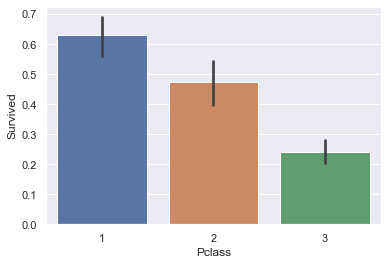

In [14]:
sns.barplot(x="Pclass", y="Survived", data=train)

print("Survived Pclass 1:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Survived Pclass 2:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Survived Pclass 3:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

### Sex vs. Survival

Females have better survival chance.

Females Survived: 74.20382165605095
Males Survived: 18.890814558058924


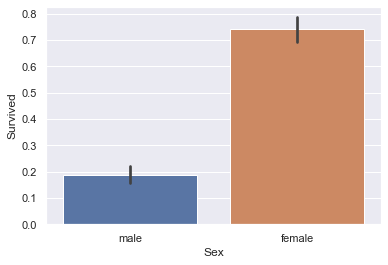

In [15]:
sns.barplot(x="Sex", y="Survived", data=train)

print("Females Survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Males Survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

## B. Feature Extraction

In this section, we select the appropriate features to train our classifier. Here, we create new features based on existing features. We also convert categorical features into numeric form.

### Sex Feature

We convert the categorical value of *Sex* into numeric. We represent 0 as female and 1 as male.

In [16]:
sex_mapping = {"male": 1, "female": 0}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### Age Feature

We first fill the NULL values of *Age* 

In [17]:
guess_ages = np.zeros((2,3))
guess_ages

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_data = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            age_guess = guess_data.median()

            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train['Age_group'] = pd.cut(train['Age'], 5)
train[['Age_group', 'Survived']].groupby(['Age_group'], as_index=False).mean().sort_values(by='Age_group', ascending=True)

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    
train = train.drop(['Age_group'], axis=1)
combine = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,8.0500,NaN,S


### Fare Feature

Replace missing *Fare* values with the median of *Fare*.

In [18]:
median = train["Fare"].median()
train['Fare'] = train["Fare"].fillna(median)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,8.0500,NaN,S


### SibSp & Parch Feature

Combining *SibSp* & *Parch* feature, we create a new feature named *FamilySize*.

In [19]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

train = train.drop(['Parch', 'SibSp'], axis=1)
test = test.drop(['Parch', 'SibSp'], axis=1)
combine = [train, test]

train.head()

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,1,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,1,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,2,373450,8.0500,NaN,S,1


In [20]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,0,3,1,1,A/5 21171,7.2500,NaN,S,2,1
1,1,1,0,2,PC 17599,71.2833,C85,C,2,3
2,1,3,0,1,STON/O2. 3101282,7.9250,NaN,S,1,2
3,1,1,0,2,113803,53.1000,C123,S,2,3
4,0,3,1,2,373450,8.0500,NaN,S,1,1


In [21]:
train = train.drop(['Ticket', 'Cabin','Fare'], axis=1)
test = test.drop(['Ticket', 'Cabin','Fare'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,Embarked,FamilySize,Title
0,0,3,1,1,S,2,1
1,1,1,0,2,C,2,3
2,1,3,0,1,S,1,2
3,1,1,0,2,S,2,3
4,0,3,1,2,S,1,1


In [22]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


,Survived,Pclass,Sex,Age,Embarked,FamilySize,Title
0,0,3,1,1,0,2,1
1,1,1,0,2,1,2,3
2,1,3,0,1,0,1,2
3,1,1,0,2,0,2,3
4,0,3,1,2,0,1,1


## C. Data Modeling

Define training and testing set

In [23]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()

There are many classifying algorithms present. Among them, we choose the following *Classification* algorithms for our problem:

- Logistic Regression
- k-Nearest Neighbor (KNN)
- Decision Tree
- Random Forest
- Naive Bayes (GaussianNB)

Here's the training and testing procedure:

> First, we train these classifiers with our training data. 
>
> After that, using the trained classifier, we predict the *Survival* outcome of test data.
>
> Finally, we calculate the accuracy score (in percentange) of the trained classifier.

***Please note:*** that the accuracy score is generated based on our training dataset.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


#Logistics Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print("Logistic Regression:",round(acc_log,2,), "%")

#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print("KNN:",round(acc_knn,2,), "%")

#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("Decision Tree:",round(acc_decision_tree,2,), "%")

#Random Forest
random_forest= RandomForestClassifier(n_estimators=100,
                             max_features='auto',
                             criterion='entropy',
                             max_depth=10)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Random Forest:",round(acc_random_forest,2,), "%")

#Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print("Gaussian Naive Bayes:",round(acc_gaussian,2,), "%")


Logistic Regression: 80.25 %
KNN: 83.95 %
Decision Tree: 86.31 %
Random Forest: 86.31 %
Gaussian Naive Bayes: 80.58 %


## D. Model Evaluation

Let's compare the accuracy score of all the classifier models used above based on testing data.

In [25]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 
              'Decision Tree','Random Forest',
              'Gaussian Naive Bayes'],
    'Score': [ acc_log,acc_knn,
              acc_decision_tree,acc_random_forest,
             acc_gaussian]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

,Model
Score,
86.31,Decision Tree
86.31,Random Forest
83.95,KNN
80.58,Gaussian Naive Bayes
80.25,Logistic Regression


From the above table, we can see that Decision Tree classfiers and Random Forest classfiers have the highest accuracy score.


# 2. Regression: House Prices - Advanced Regression Techniques
### https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Loading Datasets

Loading train and test dataset

In [26]:
train = pd.read_csv('train_home.csv')
test = pd.read_csv('test_home.csv')

## A. EDA

## Looking into the training dataset

In [27]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
train.shape

(1460, 81)

In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [30]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [31]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [32]:
cols_missing_data = ['Alley','PoolQC', 'Fence', 'MiscFeature']

train = train.drop(cols_missing_data, axis=1)

In [33]:
train.shape

(1460, 77)

In [34]:
train = train.fillna(train.min())
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [35]:
train = train.drop(train[(train['SalePrice']>740000) & (train['SalePrice']<756000)].index).reset_index(drop=True)
train = train.drop(train[(train['1stFlrSF']>4690) & (train['1stFlrSF']<4700)].index).reset_index(drop=True)
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<250000)].index).reset_index(drop=True)
train = train.drop(train[(train['GarageCars']>3) & (train['SalePrice']<290000)].index).reset_index(drop=True)
train = train.drop(train[(train['GarageArea']>1240) & (train['GarageArea']<1400)].index).reset_index(drop=True)

## Looking into the testing dataset

In [36]:
test.shape

(1459, 80)

In [37]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [38]:
test = test.drop(cols_missing_data, axis=1)

In [39]:
test = test.fillna(test.min())

## Relationship between Features and Target

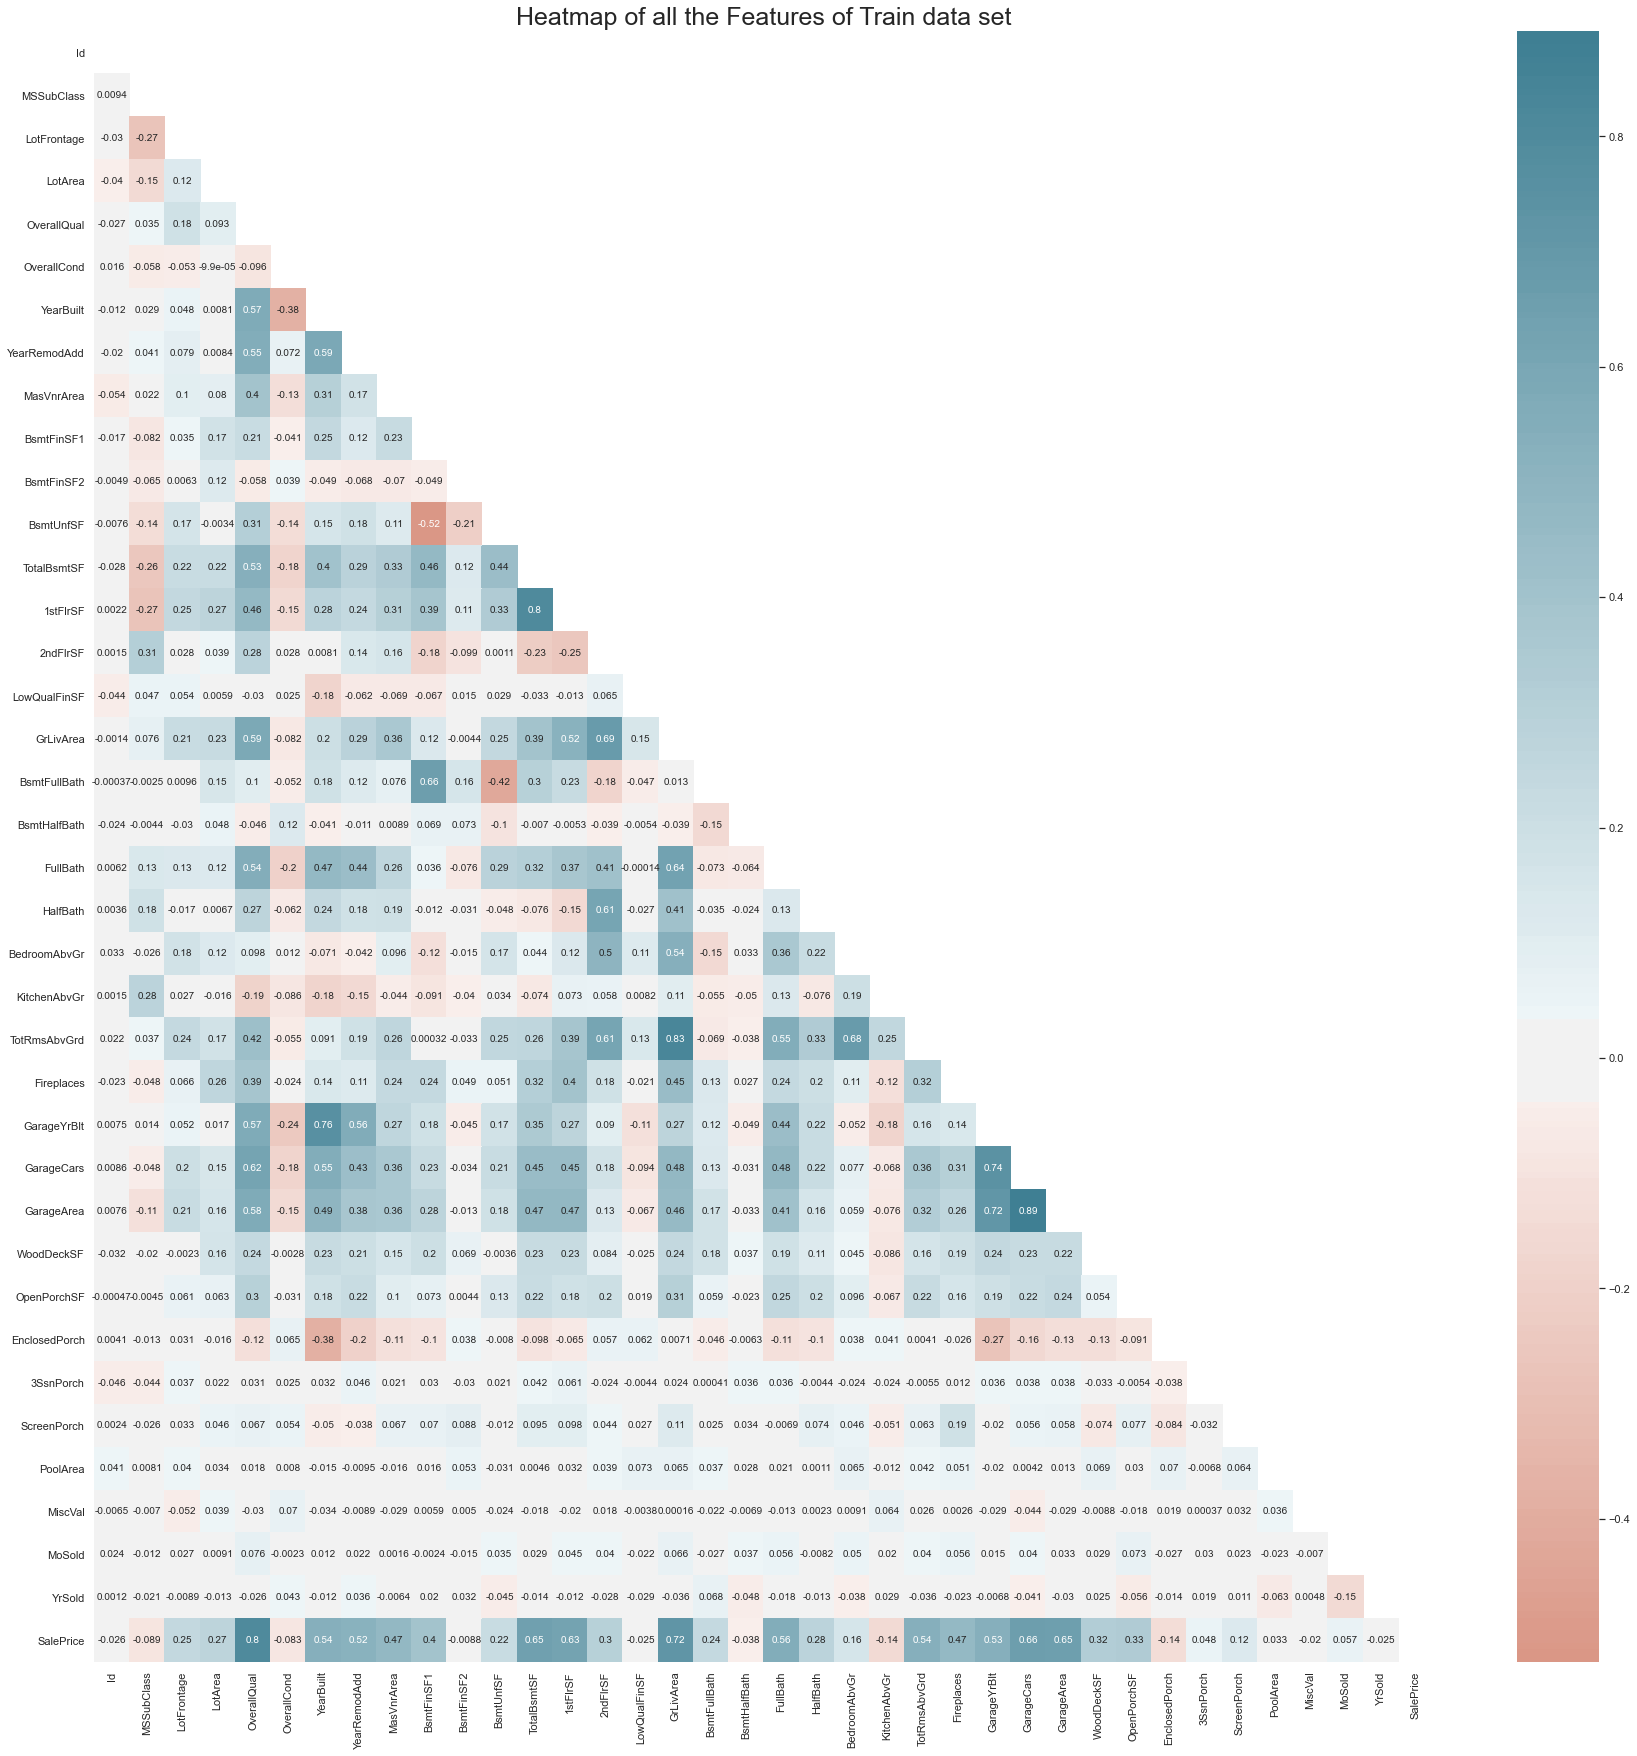

In [40]:
import matplotlib.style as style
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,30))

mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

In [41]:
Check = pd.DataFrame(index=None, columns=['Feature','Missing from Test to Train', 'Items'])
cols=np.array(test.columns[test.dtypes == object])
for fe in cols:
    listtrain = train[fe]
    listtest = test[fe]
    Check = Check.append(pd.Series({'Feature':fe, 'Missing from Test to Train': len(set(listtest).difference(listtrain)), 'Items':set(listtest).difference(listtrain) }),ignore_index=True )
Check

,Feature,Missing from Test to Train,Items
0,MSZoning,1,{nan}
1,Street,0,{}
2,LotShape,0,{}
3,LandContour,0,{}
4,Utilities,1,{nan}
5,LotConfig,0,{}
6,LandSlope,0,{}
7,Neighborhood,0,{}
8,Condition1,0,{}
9,Condition2,0,{}


In [42]:
train['MSZoning'].mode()[0]

'RL'

In [43]:
train['Exterior1st'].fillna("VinylSd", inplace=True)
train['Exterior2nd'].fillna("VinylSd", inplace=True)
train['KitchenQual'].fillna("TA", inplace=True)
train['Functional'].fillna("Typ", inplace=True)
train['SaleType'].fillna("WD", inplace=True)

test['MSZoning'].fillna('RL', inplace=True)
test['Utilities'].fillna('NoSeWa', inplace=True)
test['Exterior1st'].fillna("VinylSd", inplace=True)
test['Exterior2nd'].fillna("VinylSd", inplace=True)
test['KitchenQual'].fillna("TA", inplace=True)
test['Functional'].fillna("Typ", inplace=True)
test['SaleType'].fillna("WD", inplace=True)
test['Electrical'].fillna("SBrkr")

train = train.fillna("None")
test = test.fillna("None")

In [44]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [45]:
test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [46]:
import copy
d_train=copy.deepcopy(train)
d_test=copy.deepcopy(test)

cols=np.array(train.columns[train.dtypes != object])
for i in d_train.columns:
    if i not in cols:
        d_train[i]=d_train[i].map(str)
        d_test[i]=d_test[i].map(str)
d_train.drop(columns=cols,inplace=True)
d_test.drop(columns=np.delete(cols,len(cols)-1),inplace=True)

## B. Feature Extraction

In this section, we select the appropriate features to train our classifier. Here, we create new features based on existing features. We also convert categorical features into numeric form.

In [47]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols = np.array(train.columns[train.dtypes != object])
d    = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform 
d_train = d_train.apply(lambda x: d[x.name].fit_transform(x))
d_test  = d_test.apply(lambda x: d[x.name].transform(x))
d_train[cols] = train[cols]
d_test[np.delete(cols,len(cols)-1)]=test[np.delete(cols,len(cols)-1)]

d_train.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,3,3,0,4,0,5,2,2,0,5,1,0,12,13,1,2,4,2,2,4,3,2,6,1,0,1,5,2,6,3,1,2,5,5,2,8,4,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,3,1,3,3,0,2,0,24,1,2,0,2,1,0,8,8,2,3,4,1,2,4,1,0,6,1,0,1,5,3,6,5,1,2,5,5,2,8,4,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500


In [48]:
d_test.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,2,1,3,3,0,4,0,12,1,2,0,2,1,0,12,13,2,3,4,1,4,4,3,5,3,1,4,1,5,3,6,3,1,3,5,5,2,8,4,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,3,1,0,3,0,0,0,12,2,2,0,2,3,0,13,14,1,3,4,1,4,4,3,0,6,1,4,1,5,2,6,3,1,3,5,5,2,8,4,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010


In [49]:
d_train["O_Style"] = d_train["Condition1"] +  d_train["Condition2"] + d_train["BldgType"] + d_train["HouseStyle"]+ d_train["RoofStyle"] + d_train["MasVnrType"]
d_train["O_Neighbor"] = d_train["Street"] +  d_train["LotShape"] + d_train["Neighborhood"] * d_train["Condition1"]
d_train["O_Street"] = d_train["Street"] *  d_train["LotShape"] + d_train["LandContour"] * d_train["LotConfig"]
d_train["SqFtPerRoom"] = d_train["GrLivArea"] / (d_train["TotRmsAbvGrd"] + d_train["FullBath"] +d_train["HalfBath"] + d_train["KitchenAbvGr"])
d_train["HighQualSF"] = d_train["1stFlrSF"] + d_train["2ndFlrSF"] + d_train["TotalBsmtSF"]
d_train["Years_Years"] = d_train["YrSold"] - d_train["YearRemodAdd"]
d_train['Total_Home_Quality'] = d_train['OverallQual'] + d_train['OverallCond']
d_train['Total_Bathrooms'] = (d_train['FullBath'] + (0.5 * d_train['HalfBath']) + d_train['BsmtFullBath'] + (0.5 * d_train['BsmtHalfBath']))

d_test["O_Style"] = d_test["Condition1"] +  d_test["Condition2"] + d_test["BldgType"] + d_test["HouseStyle"]+ d_test["RoofStyle"] + d_test["MasVnrType"]
d_test["O_Neighbor"] = d_test["Street"] +  d_test["LotShape"] + d_test["Neighborhood"] * d_test["Condition1"]
d_test["O_Street"] = d_test["Street"] *  d_test["LotShape"] + d_test["LandContour"] * d_test["LotConfig"]
d_test["SqFtPerRoom"] = d_test["GrLivArea"] / (d_test["TotRmsAbvGrd"] + d_test["FullBath"] +d_test["HalfBath"] + d_test["KitchenAbvGr"])
d_test["HighQualSF"] = d_test["1stFlrSF"] + d_test["2ndFlrSF"] + d_test["TotalBsmtSF"]
d_test["Years_Years"] = d_test["YrSold"] - d_test["YearRemodAdd"]
d_test['Total_Home_Quality'] = d_test['OverallQual'] + d_test['OverallCond']
d_test['Total_Bathrooms'] = (d_test['FullBath'] + (0.5 * d_test['HalfBath']) + d_test['BsmtFullBath'] + (0.5 * d_test['BsmtHalfBath']))

In [50]:
d_train = d_train.drop(['Id'], axis=1)
d_test = d_test.drop(['Id'], axis=1)

In [51]:
from sklearn.model_selection import train_test_split

X = d_train.drop(columns=['SalePrice']).values
y = np.log1p(train["SalePrice"])
Z = d_test.values

X_d_train, X_d_test1, y_d_train, y_d_test1 = train_test_split(X, y, test_size = 0.0001, random_state = 42)
X_d_train1, X_d_test, y_d_train1, y_d_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

## C. Data Modeling

Choose at least three algorithms

In [52]:
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

## D. Model Evaluation

Let's compare the accuracy score of all the classifier models used above based on testing data.

In [53]:
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])

regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['GradientBoostingRegressor',GradientBoostingRegressor()],
              ['ExtraTreesRegressor',ExtraTreesRegressor()]]

for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_d_train1,y_d_train1)
    ATrS =  model.score(X_d_train1,y_d_train1)
    ATeS = model.score(X_d_test,y_d_test)
    RMSE = mean_squared_error(y_d_test, model.predict(X_d_test))
        
    Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}),ignore_index=True )
    
Acc.sort_values(by='Root Mean Squared  Error')

,model,Root Mean Squared Error,Accuracy on Traing set,Accuracy on Testing set
1,GradientBoostingRegressor,0.020168,0.97652,0.873487
2,ExtraTreesRegressor,0.020593,1.00000,0.870822
0,DecisionTreeRegressor,0.041819,1.00000,0.737673
